In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
h = 0.25

In [3]:
fFD =  1./(2.*h*h) 
fPD =  1./(8.*h/2*h/2) 

In [4]:
M = np.zeros([23,23])

In [5]:
M [0][0] = 1

In [6]:
for i in range (1,4):
    M [i][i-1] = -2 * fFD
    M [i][i] = 4 * fFD
    M [i][i+1] = -2 * fFD

Match the displacement $u_3$ and $u_5$

In [7]:
M [5][5] = -1
M [5][3] = 1

Match the displacement $u_4$ and $u_7$

In [8]:
M [4][4] = -1
M [4][7] = 1

Interpolate the displacement $u_6$ and $u_6'$

* $u_6'-u_6=0$
* $\frac{1}{2}\left(u_3 + u_4\right)-u_5=0$

In [9]:
M [6][6] = -1
M [6][2] = -1/8
M [6][3] = 3/4
M [6][4] = 3/8

Apply the non-local model

In [10]:
for i in range(7,16):
    M[i][i-2] = -1.  * fPD
    M[i][i-1] = -4. * fPD
    M[i][i] = 10. * fPD
    M[i][i+1] =  -4. * fPD
    M[i][i+2] = -1. * fPD

Interpolate the displacement $u_{16}$ and $u_{16}'$

In [11]:
M [16][16] = -1
M [16][18] = 3/8
M [16][19] = 3/4
M [16][20] = -1/8

Match the displacement $u_{17}$ and $u_{19}$

In [12]:
M [17][17] = -1
M [17][19] = 1

Match the displacement $u_{15}$ and $u_{18}$

In [13]:
M [18][18] = -1
M [18][15] = 1

In [14]:
for i in range (19,22):
    M [i][i-1] = -2  * fFD
    M [i][i] = 4 * fFD
    M [i][i+1] = -2 * fFD

In [15]:
M [22][22] = 11/6/h
M [22][21] = -18/6/h
M [22][20] = 9/6/h
M [22][19] = -2/6/h

In [16]:
M

array([[  1.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ],
       [-16.        ,  32.        , -16.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ],
       [  0.        , -16.        ,  32.        , -16.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
  

In [17]:
x=np.arange(0,1,0.125)
x

array([0.   , 0.125, 0.25 , 0.375, 0.5  , 0.625, 0.75 , 0.875])

In [18]:
x1 = np.arange(0,1.25,0.25)
x1

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [19]:
x2 = np.arange(1-2*0.125,2+3*0.125,0.125)
x2

array([0.75 , 0.875, 1.   , 1.125, 1.25 , 1.375, 1.5  , 1.625, 1.75 ,
       1.875, 2.   , 2.125, 2.25 ])

In [20]:
x3 = np.arange(2,3.25,0.25)
x3

array([2.  , 2.25, 2.5 , 2.75, 3.  ])

In [21]:
x = np.array(np.concatenate((x1,x2,x3)))
x

array([0.   , 0.25 , 0.5  , 0.75 , 1.   , 0.75 , 0.875, 1.   , 1.125,
       1.25 , 1.375, 1.5  , 1.625, 1.75 , 1.875, 2.   , 2.125, 2.25 ,
       2.   , 2.25 , 2.5  , 2.75 , 3.   ])

Contruct the force vector

In [22]:
f = np.zeros([23])
f

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0.])

In [23]:
for i in range(1,len(f)-1):
    f[i] = -6*x[i]

In [24]:
f [4] = 0 # the displacememnt is matching therefore the force is zero
f [5] = 0 
f [6] = 0 
f [18] = 0 
f [16] = 0
f [17] = 0
f [22] = 27

In [25]:
f

array([  0.  ,  -1.5 ,  -3.  ,  -4.5 ,   0.  ,   0.  ,   0.  ,  -6.  ,
        -6.75,  -7.5 ,  -8.25,  -9.  ,  -9.75, -10.5 , -11.25, -12.  ,
         0.  ,   0.  ,   0.  , -13.5 , -15.  , -16.5 ,  27.  ])

In [26]:
u = np.linalg.solve(M,f)
u

array([-0.00000000e+00,  1.56250000e-02,  1.25000000e-01,  4.21875000e-01,
        1.00000000e+00,  4.21875000e-01,  6.75781250e-01,  1.00000000e+00,
        1.41997937e+00,  1.94508253e+00,  2.58743232e+00,  3.35867851e+00,
        4.27054970e+00,  5.33477450e+00,  6.56300265e+00,  7.96735702e+00,
        9.55720077e+00,  1.13579820e+01,  7.96735702e+00,  1.13579820e+01,
        1.55923570e+01,  2.07642320e+01,  2.69673570e+01])

In [27]:
x1 = np.arange(0,1,0.25)
x2 = np.arange(1,2,0.125)
x3 = np.arange(2,3.25,0.25)
x20 = np.array(np.concatenate((x1,x2,x3)))
x20

array([0.   , 0.25 , 0.5  , 0.75 , 1.   , 1.125, 1.25 , 1.375, 1.5  ,
       1.625, 1.75 , 1.875, 2.   , 2.25 , 2.5  , 2.75 , 3.   ])

In [28]:
uSlice = np.array(np.concatenate((u[0:5],u[8:15],u[18:len(u)])))
uSlice

array([-0.00000000e+00,  1.56250000e-02,  1.25000000e-01,  4.21875000e-01,
        1.00000000e+00,  1.41997937e+00,  1.94508253e+00,  2.58743232e+00,
        3.35867851e+00,  4.27054970e+00,  5.33477450e+00,  6.56300265e+00,
        7.96735702e+00,  1.13579820e+01,  1.55923570e+01,  2.07642320e+01,
        2.69673570e+01])

In [29]:
len(u)

23

In [30]:
len(uSlice)

17

In [31]:
len(x20)

17

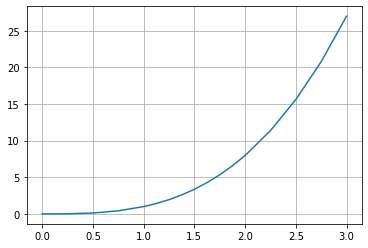

In [32]:
plt.plot(x20,uSlice)
plt.grid()

In [33]:
h2= 0.125

In [34]:
fFD2 =  1./(2.*h2*h2) 
fPD2 =  1./(8.*h2/2*h2/2) 

In [35]:
M2 = np.zeros([39,39])

In [36]:
M2 [0][0] = 1

In [37]:
for i in range (1, 8):
    M2[i][i-1]=-2 * fFD2
    M2[i][i]= 4 * fFD2
    M2[i][i+1]= -2 * fFD2

Match the dispacement between $u_7$ and $u_9$

In [38]:
M2[9][9]= -1
M2[9][7]=1

Match the dispacement between $u_8$ and $u_{11}$

In [39]:
M2[8][8]= -1
M2[8][11]=1

Interpolate the displacement $u_{10}$ and $u_{9}'$

* $u_{10}'-u_{10}=0$
* $\frac{1}{2}\left(u_7 + u_8\right)-u_{10}=0$

In [40]:
M2 [10][10] = -1
M2 [10][6] = -1/8
M2 [10][7] = 3/4
M2 [10][8] = 3/8

Apply the non-local model

In [41]:
for i in range(11,28):
    M2[i][i-2] = -1.  * fPD2
    M2[i][i-1] = -4. * fPD2
    M2[i][i] = 10. * fPD2
    M2[i][i+1] =  -4. * fPD2
    M2[i][i+2] = -1. * fPD2

Interpolate the displacement $u_{28}$ and $u_{28}'$

* $u_{28}'-u_{28}=0$
* $\frac{1}{2}\left(u_{30} + u_{31}\right)-u_{28}=0$

In [42]:
M2 [28][28] = -1
M2 [28][30] = 3/8
M2 [28][31] = 3/4
M2 [28][32] = -1/8

Match the displacement $u_{29}$ and $u_{31}$

In [43]:
M2 [29][29] = -1
M2 [29][31] = 1

Match the displacement $u_{27}$ and $u_{30}$

In [44]:
M2 [30][30] = -1
M2 [30][27] = 1

In [45]:
for i in range (31, 38):
    M2[i][i-1]=-2 * fFD2
    M2[i][i]= 4 * fFD2
    M2[i][i+1]= -2 * fFD2

In [46]:
M2 [38][38] = 11/6/h2
M2 [38][37] = -18/6/h2
M2 [38][36] = 9/6/h2
M2 [38][35] = -2/6/h2
M2

array([[  1.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [-64.        , 128.        , -64.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        , -64.        , 128.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ..., 128.        ,
        -64.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ..., -64.        ,
        128.        , -64.        ],
       [  0.        ,   0.        ,   0.        , ...,  12.        ,
        -24.        ,  14.66666667]])

In [47]:
x1 = np.arange(0,1.125,0.125)
x2 = np.arange(1-2*0.0625,2+3*0.0625,0.0625)
x3 = np.arange(2,3.125,0.125)
x = np.array(np.concatenate((x1,x2,x3)))
x

array([0.    , 0.125 , 0.25  , 0.375 , 0.5   , 0.625 , 0.75  , 0.875 ,
       1.    , 0.875 , 0.9375, 1.    , 1.0625, 1.125 , 1.1875, 1.25  ,
       1.3125, 1.375 , 1.4375, 1.5   , 1.5625, 1.625 , 1.6875, 1.75  ,
       1.8125, 1.875 , 1.9375, 2.    , 2.0625, 2.125 , 2.    , 2.125 ,
       2.25  , 2.375 , 2.5   , 2.625 , 2.75  , 2.875 , 3.    ])

In [48]:
f2 = np.zeros([39])
f2

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.])

In [49]:
for i in range(1,len(f2)-1):
    f2[i] = -6*x[i]

In [50]:
f2 [8] = 0 # the displacememnt is matching therefore the force is zero
f2 [9] = 0 
f2 [10] = 0 
f2 [30] = 0 
f2 [28] = 0
f2 [29] = 0
f2 [38] = 27
f2

array([  0.   ,  -0.75 ,  -1.5  ,  -2.25 ,  -3.   ,  -3.75 ,  -4.5  ,
        -5.25 ,   0.   ,   0.   ,   0.   ,  -6.   ,  -6.375,  -6.75 ,
        -7.125,  -7.5  ,  -7.875,  -8.25 ,  -8.625,  -9.   ,  -9.375,
        -9.75 , -10.125, -10.5  , -10.875, -11.25 , -11.625, -12.   ,
         0.   ,   0.   ,   0.   , -12.75 , -13.5  , -14.25 , -15.   ,
       -15.75 , -16.5  , -17.25 ,  27.   ])

In [51]:
u2 = np.linalg.solve(M2,f2)
u2

array([-0.00000000e+00,  1.95312500e-03,  1.56250000e-02,  5.27343750e-02,
        1.25000000e-01,  2.44140625e-01,  4.21875000e-01,  6.69921875e-01,
        1.00000000e+00,  6.69921875e-01,  8.24707031e-01,  1.00000000e+00,
        1.19898180e+00,  1.42282282e+00,  1.67303842e+00,  1.95108479e+00,
        2.25842825e+00,  2.59653339e+00,  2.96686510e+00,  3.37088821e+00,
        3.81006758e+00,  4.28586804e+00,  4.79975443e+00,  5.35319164e+00,
        5.94764425e+00,  6.58457861e+00,  7.26545088e+00,  7.99177642e+00,
        8.76472564e+00,  9.58747955e+00,  7.99177642e+00,  9.58747955e+00,
        1.13824014e+01,  1.33882608e+01,  1.56167764e+01,  1.80796670e+01,
        2.07886514e+01,  2.37554483e+01,  2.69917764e+01])

In [52]:
x4 = np.arange(0,1,0.125)
x5 = np.arange(1,2,0.0625)
x6 = np.arange(2,3.125,0.125)
x7 = np.array(np.concatenate((x4,x5,x6)))
x7

array([0.    , 0.125 , 0.25  , 0.375 , 0.5   , 0.625 , 0.75  , 0.875 ,
       1.    , 1.0625, 1.125 , 1.1875, 1.25  , 1.3125, 1.375 , 1.4375,
       1.5   , 1.5625, 1.625 , 1.6875, 1.75  , 1.8125, 1.875 , 1.9375,
       2.    , 2.125 , 2.25  , 2.375 , 2.5   , 2.625 , 2.75  , 2.875 ,
       3.    ])

In [53]:
uSlice2 = np.array(np.concatenate((u2[0:9],u2[12:27],u2[30:len(u2)])))
uSlice2

array([-0.00000000e+00,  1.95312500e-03,  1.56250000e-02,  5.27343750e-02,
        1.25000000e-01,  2.44140625e-01,  4.21875000e-01,  6.69921875e-01,
        1.00000000e+00,  1.19898180e+00,  1.42282282e+00,  1.67303842e+00,
        1.95108479e+00,  2.25842825e+00,  2.59653339e+00,  2.96686510e+00,
        3.37088821e+00,  3.81006758e+00,  4.28586804e+00,  4.79975443e+00,
        5.35319164e+00,  5.94764425e+00,  6.58457861e+00,  7.26545088e+00,
        7.99177642e+00,  9.58747955e+00,  1.13824014e+01,  1.33882608e+01,
        1.56167764e+01,  1.80796670e+01,  2.07886514e+01,  2.37554483e+01,
        2.69917764e+01])

In [54]:
len(u2)

39

In [55]:
len(x7)

33

In [56]:
len(uSlice2)

33

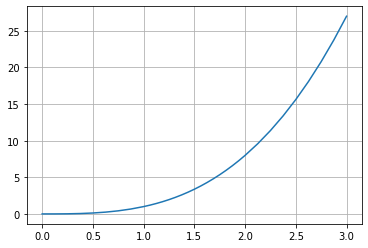

In [57]:
plt.plot(x7,uSlice2)
plt.grid()

In [58]:
h3=0.0625

In [59]:
fFD3 =  1./(2.*h3*h3) 
fPD3 =  1./(8.*h3/2*h3/2) 

In [60]:
M3 = np.zeros([71,71])

In [61]:
M3 [0][0] = 1

In [62]:
for i in range (1, 16):
    M3[i][i-1]=-2 * fFD3
    M3[i][i]= 4 * fFD3
    M3[i][i+1]= -2 * fFD3

Match the dispacement between $u_{15}$ and $u_{17}$

In [63]:
M3[17][17]= -1
M3[17][15]=1

Match the dispacement between $u_{16}$ and $u_{19}$

In [64]:
M3[16][16]= -1
M3[16][19]=1

Interpolate the displacement $u_{18}$ and $u_{18}'$

* $u_{18}'-u_{18}=0$
* $\frac{1}{2}\left(u_{15} + u_{16}\right)-u_{18}=0$

In [65]:
M3 [18][18] = -1
M3 [18][14]= -1/8
M3 [18][15] = 3/4
M3 [18][16] = 3/8

Apply the non-local model

In [66]:
for i in range(19,52):
    M3[i][i-2] = -1.  * fPD3
    M3[i][i-1] = -4. * fPD3
    M3[i][i] = 10. * fPD3
    M3[i][i+1] =  -4. * fPD3
    M3[i][i+2] = -1. * fPD3

Interpolate the displacement $u_{52}$ and $u_{52}'$

* $u_{52}'-u_{52}=0$
* $\frac{1}{2}\left(u_{54} + u_{55}\right)-u_{52}=0$

In [67]:
M3 [52][52] = -1
M3 [52][54] = 3/8
M3 [52][55] = 3/4
M3 [52][56] = -1/8

Match the displacement $u_{51}$ and $u_{54}$

In [68]:
M3 [54][54] = -1
M3 [54][51] = 1

Match the displacement $u_{53}$ and $u_{55}$

In [69]:
M3 [53][53] = -1
M3 [53][55] = 1

In [70]:
for i in range (55, 70):
    M3[i][i-1]=-2 * fFD3
    M3[i][i]= 4 * fFD3
    M3[i][i+1]= -2 * fFD3

In [71]:
M3 [70][70] = 11/6/h3
M3 [70][69] = -18/6/h3
M3 [70][68] = 9/6/h3
M3 [70][67] = -2/6/h3
M3

array([[   1.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [-256.        ,  512.        , -256.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        , -256.        ,  512.        , ...,    0.        ,
           0.        ,    0.        ],
       ...,
       [   0.        ,    0.        ,    0.        , ...,  512.        ,
        -256.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ..., -256.        ,
         512.        , -256.        ],
       [   0.        ,    0.        ,    0.        , ...,   24.        ,
         -48.        ,   29.33333333]])

In [72]:
x1 = np.arange(0,1.0625,0.0625)
x2 = np.arange(1-2*0.03125,2+3*0.03125,0.03125)
x3 = np.arange(2,3.0625,0.0625)
x = np.array(np.concatenate((x1,x2,x3)))
x

array([0.     , 0.0625 , 0.125  , 0.1875 , 0.25   , 0.3125 , 0.375  ,
       0.4375 , 0.5    , 0.5625 , 0.625  , 0.6875 , 0.75   , 0.8125 ,
       0.875  , 0.9375 , 1.     , 0.9375 , 0.96875, 1.     , 1.03125,
       1.0625 , 1.09375, 1.125  , 1.15625, 1.1875 , 1.21875, 1.25   ,
       1.28125, 1.3125 , 1.34375, 1.375  , 1.40625, 1.4375 , 1.46875,
       1.5    , 1.53125, 1.5625 , 1.59375, 1.625  , 1.65625, 1.6875 ,
       1.71875, 1.75   , 1.78125, 1.8125 , 1.84375, 1.875  , 1.90625,
       1.9375 , 1.96875, 2.     , 2.03125, 2.0625 , 2.     , 2.0625 ,
       2.125  , 2.1875 , 2.25   , 2.3125 , 2.375  , 2.4375 , 2.5    ,
       2.5625 , 2.625  , 2.6875 , 2.75   , 2.8125 , 2.875  , 2.9375 ,
       3.     ])

In [73]:
f3 = np.zeros([71])
f3

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [74]:
for i in range(1,len(f3)-1):
    f3[i] = -6*x[i]

In [75]:
f3 [16] = 0 # the displacememnt is matching therefore the force is zero
f3 [17] = 0 
f3 [18] = 0 
f3 [52] = 0 
f3 [53] = 0
f3 [54] = 0
f3 [70] =27
f3

array([  0.    ,  -0.375 ,  -0.75  ,  -1.125 ,  -1.5   ,  -1.875 ,
        -2.25  ,  -2.625 ,  -3.    ,  -3.375 ,  -3.75  ,  -4.125 ,
        -4.5   ,  -4.875 ,  -5.25  ,  -5.625 ,   0.    ,   0.    ,
         0.    ,  -6.    ,  -6.1875,  -6.375 ,  -6.5625,  -6.75  ,
        -6.9375,  -7.125 ,  -7.3125,  -7.5   ,  -7.6875,  -7.875 ,
        -8.0625,  -8.25  ,  -8.4375,  -8.625 ,  -8.8125,  -9.    ,
        -9.1875,  -9.375 ,  -9.5625,  -9.75  ,  -9.9375, -10.125 ,
       -10.3125, -10.5   , -10.6875, -10.875 , -11.0625, -11.25  ,
       -11.4375, -11.625 , -11.8125, -12.    ,   0.    ,   0.    ,
         0.    , -12.375 , -12.75  , -13.125 , -13.5   , -13.875 ,
       -14.25  , -14.625 , -15.    , -15.375 , -15.75  , -16.125 ,
       -16.5   , -16.875 , -17.25  , -17.625 ,  27.    ])

In [76]:
u3 = np.linalg.solve(M3,f3)
u3

array([-0.00000000e+00,  2.44140625e-04,  1.95312500e-03,  6.59179688e-03,
        1.56250000e-02,  3.05175781e-02,  5.27343750e-02,  8.37402344e-02,
        1.25000000e-01,  1.77978516e-01,  2.44140625e-01,  3.24951172e-01,
        4.21875000e-01,  5.36376953e-01,  6.69921875e-01,  8.23974609e-01,
        1.00000000e+00,  8.23974609e-01,  9.09240723e-01,  1.00000000e+00,
        1.09665007e+00,  1.19933723e+00,  1.30825090e+00,  1.42357310e+00,
        1.54548712e+00,  1.67417605e+00,  1.80982298e+00,  1.95261103e+00,
        2.10272329e+00,  2.26034288e+00,  2.42565290e+00,  2.59883645e+00,
        2.78007665e+00,  2.96955659e+00,  3.16745938e+00,  3.37396813e+00,
        3.58926594e+00,  3.81353592e+00,  4.04696117e+00,  4.28972480e+00,
        4.54200992e+00,  4.80399962e+00,  5.07587702e+00,  5.35782523e+00,
        5.65002733e+00,  5.95266645e+00,  6.26592569e+00,  6.58998815e+00,
        6.92503692e+00,  7.27125528e+00,  7.62882525e+00,  7.99793625e+00,
        8.37873459e+00,  

In [77]:
x8 = np.arange(0,1,0.0625)
x9 = np.arange(1,2,0.03125)
x10 = np.arange(2,3.0625,0.0625)
x11 = np.array(np.concatenate((x8,x9,x10)))
x11

array([0.     , 0.0625 , 0.125  , 0.1875 , 0.25   , 0.3125 , 0.375  ,
       0.4375 , 0.5    , 0.5625 , 0.625  , 0.6875 , 0.75   , 0.8125 ,
       0.875  , 0.9375 , 1.     , 1.03125, 1.0625 , 1.09375, 1.125  ,
       1.15625, 1.1875 , 1.21875, 1.25   , 1.28125, 1.3125 , 1.34375,
       1.375  , 1.40625, 1.4375 , 1.46875, 1.5    , 1.53125, 1.5625 ,
       1.59375, 1.625  , 1.65625, 1.6875 , 1.71875, 1.75   , 1.78125,
       1.8125 , 1.84375, 1.875  , 1.90625, 1.9375 , 1.96875, 2.     ,
       2.0625 , 2.125  , 2.1875 , 2.25   , 2.3125 , 2.375  , 2.4375 ,
       2.5    , 2.5625 , 2.625  , 2.6875 , 2.75   , 2.8125 , 2.875  ,
       2.9375 , 3.     ])

In [78]:
uSlice3 = np.array(np.concatenate((u3[0:17],u3[20:52],u3[55:len(u3)])))
uSlice3

array([-0.00000000e+00,  2.44140625e-04,  1.95312500e-03,  6.59179688e-03,
        1.56250000e-02,  3.05175781e-02,  5.27343750e-02,  8.37402344e-02,
        1.25000000e-01,  1.77978516e-01,  2.44140625e-01,  3.24951172e-01,
        4.21875000e-01,  5.36376953e-01,  6.69921875e-01,  8.23974609e-01,
        1.00000000e+00,  1.09665007e+00,  1.19933723e+00,  1.30825090e+00,
        1.42357310e+00,  1.54548712e+00,  1.67417605e+00,  1.80982298e+00,
        1.95261103e+00,  2.10272329e+00,  2.26034288e+00,  2.42565290e+00,
        2.59883645e+00,  2.78007665e+00,  2.96955659e+00,  3.16745938e+00,
        3.37396813e+00,  3.58926594e+00,  3.81353592e+00,  4.04696117e+00,
        4.28972480e+00,  4.54200992e+00,  4.80399962e+00,  5.07587702e+00,
        5.35782523e+00,  5.65002733e+00,  5.95266645e+00,  6.26592569e+00,
        6.58998815e+00,  6.92503692e+00,  7.27125528e+00,  7.62882525e+00,
        7.99793625e+00,  8.77161789e+00,  9.59363938e+00,  1.04654655e+01,
        1.13885613e+01,  

In [79]:
len(x11)

65

In [80]:
len(uSlice3)

65

In [81]:
len(u3)

71

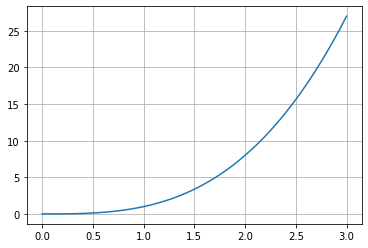

In [82]:
plt.grid()
plt.plot(x11,uSlice3)

In [83]:
def FDM (n,h):
    
    M4=np.zeros([n,n])

    M4[0][0] = 1

    for i in range(1,n-1):
        M4[i][i-1] = -2 
        M4[i][i] = 4 
        M4[i][i+1] = -2

    
    M4[n-1][n-1] = 11*h/3
    M4[n-1][n-2] = -18*h/3
    M4[n-1][n-3] = 9*h/3
    M4[n-1][n-4] = -2*h/3

    M4 *= 1./(2.*h*h)

    return M4

In [84]:
MFDM=FDM (49,0.0625)
len(MFDM)

49

In [85]:
fFDM=np.zeros([49])
len(fFDM)

49

In [86]:
x = np.arange(0,3.0625,0.0625)
x

array([0.    , 0.0625, 0.125 , 0.1875, 0.25  , 0.3125, 0.375 , 0.4375,
       0.5   , 0.5625, 0.625 , 0.6875, 0.75  , 0.8125, 0.875 , 0.9375,
       1.    , 1.0625, 1.125 , 1.1875, 1.25  , 1.3125, 1.375 , 1.4375,
       1.5   , 1.5625, 1.625 , 1.6875, 1.75  , 1.8125, 1.875 , 1.9375,
       2.    , 2.0625, 2.125 , 2.1875, 2.25  , 2.3125, 2.375 , 2.4375,
       2.5   , 2.5625, 2.625 , 2.6875, 2.75  , 2.8125, 2.875 , 2.9375,
       3.    ])

In [87]:
for i in range(1,len(fFDM)-1):
    fFDM[i] = -6*x[i] 
fFDM[48]= 27
fFDM

array([  0.   ,  -0.375,  -0.75 ,  -1.125,  -1.5  ,  -1.875,  -2.25 ,
        -2.625,  -3.   ,  -3.375,  -3.75 ,  -4.125,  -4.5  ,  -4.875,
        -5.25 ,  -5.625,  -6.   ,  -6.375,  -6.75 ,  -7.125,  -7.5  ,
        -7.875,  -8.25 ,  -8.625,  -9.   ,  -9.375,  -9.75 , -10.125,
       -10.5  , -10.875, -11.25 , -11.625, -12.   , -12.375, -12.75 ,
       -13.125, -13.5  , -13.875, -14.25 , -14.625, -15.   , -15.375,
       -15.75 , -16.125, -16.5  , -16.875, -17.25 , -17.625,  27.   ])

In [88]:
uFDM = np.linalg.solve(MFDM,fFDM)
uFDM

array([-0.00000000e+00,  2.44140625e-04,  1.95312500e-03,  6.59179687e-03,
        1.56250000e-02,  3.05175781e-02,  5.27343750e-02,  8.37402344e-02,
        1.25000000e-01,  1.77978516e-01,  2.44140625e-01,  3.24951172e-01,
        4.21875000e-01,  5.36376953e-01,  6.69921875e-01,  8.23974609e-01,
        1.00000000e+00,  1.19946289e+00,  1.42382812e+00,  1.67456055e+00,
        1.95312500e+00,  2.26098633e+00,  2.59960937e+00,  2.97045898e+00,
        3.37500000e+00,  3.81469727e+00,  4.29101562e+00,  4.80541992e+00,
        5.35937500e+00,  5.95434570e+00,  6.59179687e+00,  7.27319336e+00,
        8.00000000e+00,  8.77368164e+00,  9.59570312e+00,  1.04675293e+01,
        1.13906250e+01,  1.23664551e+01,  1.33964844e+01,  1.44821777e+01,
        1.56250000e+01,  1.68264160e+01,  1.80878906e+01,  1.94108887e+01,
        2.07968750e+01,  2.22473145e+01,  2.37636719e+01,  2.53474121e+01,
        2.70000000e+01])

In [89]:
xFDM = np.arange(0,3.0625,0.0625)
xFDM
len (xFDM)

49

In [90]:
MFDM= FDM(4,1)
len(fFDM)

49

In [91]:
for i in range(1,len(fFDM)-1):
    fFDM[i] = 6*x[i]
fFDM

array([ 0.   ,  0.375,  0.75 ,  1.125,  1.5  ,  1.875,  2.25 ,  2.625,
        3.   ,  3.375,  3.75 ,  4.125,  4.5  ,  4.875,  5.25 ,  5.625,
        6.   ,  6.375,  6.75 ,  7.125,  7.5  ,  7.875,  8.25 ,  8.625,
        9.   ,  9.375,  9.75 , 10.125, 10.5  , 10.875, 11.25 , 11.625,
       12.   , 12.375, 12.75 , 13.125, 13.5  , 13.875, 14.25 , 14.625,
       15.   , 15.375, 15.75 , 16.125, 16.5  , 16.875, 17.25 , 17.625,
       27.   ])

Text(0.5, 1.0, 'Cubic solution ')

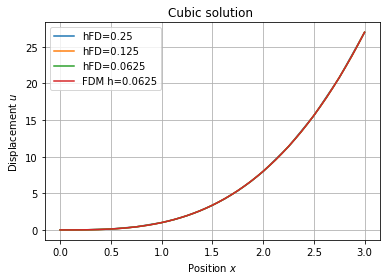

In [92]:
plt.grid()
plt.plot(x20,uSlice,label="hFD=0.25")
plt.plot(x7,uSlice2,label="hFD=0.125")
plt.plot(x11,uSlice3,label="hFD=0.0625")
plt.plot(xFDM,uFDM,label= "FDM h=0.0625")
plt.legend()
plt.xlabel(r"Position $x$")
plt.ylabel(r"Displacement $u$")
plt.title(r"Cubic solution ")

In [93]:
MFDM=FDM (49*2-1,0.0625/2)
len(MFDM)

97

In [94]:
fFDM=np.zeros([49*2-1])
len(fFDM)

97

In [95]:
len(uSlice3)

65

In [96]:
x = np.arange(0,3+0.0625/2,0.0625/2)
x

array([0.     , 0.03125, 0.0625 , 0.09375, 0.125  , 0.15625, 0.1875 ,
       0.21875, 0.25   , 0.28125, 0.3125 , 0.34375, 0.375  , 0.40625,
       0.4375 , 0.46875, 0.5    , 0.53125, 0.5625 , 0.59375, 0.625  ,
       0.65625, 0.6875 , 0.71875, 0.75   , 0.78125, 0.8125 , 0.84375,
       0.875  , 0.90625, 0.9375 , 0.96875, 1.     , 1.03125, 1.0625 ,
       1.09375, 1.125  , 1.15625, 1.1875 , 1.21875, 1.25   , 1.28125,
       1.3125 , 1.34375, 1.375  , 1.40625, 1.4375 , 1.46875, 1.5    ,
       1.53125, 1.5625 , 1.59375, 1.625  , 1.65625, 1.6875 , 1.71875,
       1.75   , 1.78125, 1.8125 , 1.84375, 1.875  , 1.90625, 1.9375 ,
       1.96875, 2.     , 2.03125, 2.0625 , 2.09375, 2.125  , 2.15625,
       2.1875 , 2.21875, 2.25   , 2.28125, 2.3125 , 2.34375, 2.375  ,
       2.40625, 2.4375 , 2.46875, 2.5    , 2.53125, 2.5625 , 2.59375,
       2.625  , 2.65625, 2.6875 , 2.71875, 2.75   , 2.78125, 2.8125 ,
       2.84375, 2.875  , 2.90625, 2.9375 , 2.96875, 3.     ])

In [97]:
x[0:32:2]

array([0.    , 0.0625, 0.125 , 0.1875, 0.25  , 0.3125, 0.375 , 0.4375,
       0.5   , 0.5625, 0.625 , 0.6875, 0.75  , 0.8125, 0.875 , 0.9375])

In [98]:
x[len(x)-33:len(x):2]

array([2.    , 2.0625, 2.125 , 2.1875, 2.25  , 2.3125, 2.375 , 2.4375,
       2.5   , 2.5625, 2.625 , 2.6875, 2.75  , 2.8125, 2.875 , 2.9375,
       3.    ])

In [99]:
for i in range(1,len(fFDM)-1):
    fFDM[i] = 6*x[i]
fFDM[len(fFDM)-1] = 27
fFDM

array([ 0.    ,  0.1875,  0.375 ,  0.5625,  0.75  ,  0.9375,  1.125 ,
        1.3125,  1.5   ,  1.6875,  1.875 ,  2.0625,  2.25  ,  2.4375,
        2.625 ,  2.8125,  3.    ,  3.1875,  3.375 ,  3.5625,  3.75  ,
        3.9375,  4.125 ,  4.3125,  4.5   ,  4.6875,  4.875 ,  5.0625,
        5.25  ,  5.4375,  5.625 ,  5.8125,  6.    ,  6.1875,  6.375 ,
        6.5625,  6.75  ,  6.9375,  7.125 ,  7.3125,  7.5   ,  7.6875,
        7.875 ,  8.0625,  8.25  ,  8.4375,  8.625 ,  8.8125,  9.    ,
        9.1875,  9.375 ,  9.5625,  9.75  ,  9.9375, 10.125 , 10.3125,
       10.5   , 10.6875, 10.875 , 11.0625, 11.25  , 11.4375, 11.625 ,
       11.8125, 12.    , 12.1875, 12.375 , 12.5625, 12.75  , 12.9375,
       13.125 , 13.3125, 13.5   , 13.6875, 13.875 , 14.0625, 14.25  ,
       14.4375, 14.625 , 14.8125, 15.    , 15.1875, 15.375 , 15.5625,
       15.75  , 15.9375, 16.125 , 16.3125, 16.5   , 16.6875, 16.875 ,
       17.0625, 17.25  , 17.4375, 17.625 , 17.8125, 27.    ])

In [100]:
uFDM4 = np.linalg.solve(MFDM,fFDM)
uFDM4

array([ -0.        ,   1.68746948,   3.37475586,   5.06167603,
         6.74804687,   8.4336853 ,  10.1184082 ,  11.80203247,
        13.484375  ,  15.16525269,  16.84448242,  18.5218811 ,
        20.19726562,  21.87045288,  23.54125977,  25.20950317,
        26.875     ,  28.53756714,  30.19702148,  31.85317993,
        33.50585937,  35.15487671,  36.80004883,  38.44119263,
        40.078125  ,  41.71066284,  43.33862305,  44.96182251,
        46.58007812,  48.19320679,  49.80102539,  51.40335083,
        53.        ,  54.59078979,  56.17553711,  57.75405884,
        59.32617187,  60.89169312,  62.45043945,  64.00222778,
        65.546875  ,  67.084198  ,  68.61401367,  70.13613892,
        71.65039062,  73.15658569,  74.65454102,  76.14407349,
        77.625     ,  79.09713745,  80.56030273,  82.01431274,
        83.45898437,  84.89413452,  86.31958008,  87.73513794,
        89.140625  ,  90.53585815,  91.9206543 ,  93.29483032,
        94.65820312,  96.0105896 ,  97.35180664,  98.68

In [101]:
x[33:len(uFDM4)-34:1]

array([1.03125, 1.0625 , 1.09375, 1.125  , 1.15625, 1.1875 , 1.21875,
       1.25   , 1.28125, 1.3125 , 1.34375, 1.375  , 1.40625, 1.4375 ,
       1.46875, 1.5    , 1.53125, 1.5625 , 1.59375, 1.625  , 1.65625,
       1.6875 , 1.71875, 1.75   , 1.78125, 1.8125 , 1.84375, 1.875  ,
       1.90625, 1.9375 ])

In [102]:
xSlice = np.array(np.concatenate((x[0:31:2],x[32:len(uFDM4)-31:1],x[len(uFDM4)-32:len(uFDM4):2])))

In [103]:
len(xSlice)

66

In [104]:
xSlice

array([0.     , 0.0625 , 0.125  , 0.1875 , 0.25   , 0.3125 , 0.375  ,
       0.4375 , 0.5    , 0.5625 , 0.625  , 0.6875 , 0.75   , 0.8125 ,
       0.875  , 0.9375 , 1.     , 1.03125, 1.0625 , 1.09375, 1.125  ,
       1.15625, 1.1875 , 1.21875, 1.25   , 1.28125, 1.3125 , 1.34375,
       1.375  , 1.40625, 1.4375 , 1.46875, 1.5    , 1.53125, 1.5625 ,
       1.59375, 1.625  , 1.65625, 1.6875 , 1.71875, 1.75   , 1.78125,
       1.8125 , 1.84375, 1.875  , 1.90625, 1.9375 , 1.96875, 2.     ,
       2.03125, 2.03125, 2.09375, 2.15625, 2.21875, 2.28125, 2.34375,
       2.40625, 2.46875, 2.53125, 2.59375, 2.65625, 2.71875, 2.78125,
       2.84375, 2.90625, 2.96875])

In [105]:
len(x11)

65

In [106]:
uFDM4Slice = np.array(np.concatenate((uFDM4[0:33:2],uFDM4[33:len(uFDM4)-33:1],uFDM4[len(uFDM4)-33:len(uFDM4):2])))


In [107]:
MFDM2=FDM(25*2-1,0.125/2)
len(MFDM2)

49

In [108]:
fFDM2=np.zeros([25*2-1])
len(fFDM2)

49

In [109]:
x2 = np.arange(0,3+0.125/2,0.125/2)
x2

array([0.    , 0.0625, 0.125 , 0.1875, 0.25  , 0.3125, 0.375 , 0.4375,
       0.5   , 0.5625, 0.625 , 0.6875, 0.75  , 0.8125, 0.875 , 0.9375,
       1.    , 1.0625, 1.125 , 1.1875, 1.25  , 1.3125, 1.375 , 1.4375,
       1.5   , 1.5625, 1.625 , 1.6875, 1.75  , 1.8125, 1.875 , 1.9375,
       2.    , 2.0625, 2.125 , 2.1875, 2.25  , 2.3125, 2.375 , 2.4375,
       2.5   , 2.5625, 2.625 , 2.6875, 2.75  , 2.8125, 2.875 , 2.9375,
       3.    ])

In [110]:
for i in range(1,len(fFDM2)-1):
    fFDM2[i] = 6*x[i]
fFDM2[len(fFDM2)-1] = 27
fFDM2

array([ 0.    ,  0.1875,  0.375 ,  0.5625,  0.75  ,  0.9375,  1.125 ,
        1.3125,  1.5   ,  1.6875,  1.875 ,  2.0625,  2.25  ,  2.4375,
        2.625 ,  2.8125,  3.    ,  3.1875,  3.375 ,  3.5625,  3.75  ,
        3.9375,  4.125 ,  4.3125,  4.5   ,  4.6875,  4.875 ,  5.0625,
        5.25  ,  5.4375,  5.625 ,  5.8125,  6.    ,  6.1875,  6.375 ,
        6.5625,  6.75  ,  6.9375,  7.125 ,  7.3125,  7.5   ,  7.6875,
        7.875 ,  8.0625,  8.25  ,  8.4375,  8.625 ,  8.8125, 27.    ])

In [111]:
uFDM5 = np.linalg.solve(MFDM2,fFDM2)
uFDM5

array([ -0.        ,   2.53112793,   5.06152344,   7.5904541 ,
        10.1171875 ,  12.64099121,  15.16113281,  17.67687988,
        20.1875    ,  22.69226074,  25.19042969,  27.68127441,
        30.1640625 ,  32.63806152,  35.10253906,  37.5567627 ,
        40.        ,  42.43151855,  44.85058594,  47.25646973,
        49.6484375 ,  52.02575684,  54.38769531,  56.73352051,
        59.0625    ,  61.37390137,  63.66699219,  65.94104004,
        68.1953125 ,  70.42907715,  72.64160156,  74.83215332,
        77.        ,  79.14440918,  81.26464844,  83.35998535,
        85.4296875 ,  87.47302246,  89.48925781,  91.47766113,
        93.4375    ,  95.36804199,  97.26855469,  99.13830566,
       100.9765625 , 102.78259277, 104.55566406, 106.29504395,
       108.        ])

In [112]:
xSlice2 = np.array(np.concatenate((x[0:17:2],x[17:len(x)-17:1],x[len(x)-17:len(x):2])))
xSlice2

array([0.     , 0.0625 , 0.125  , 0.1875 , 0.25   , 0.3125 , 0.375  ,
       0.4375 , 0.5    , 0.53125, 0.5625 , 0.59375, 0.625  , 0.65625,
       0.6875 , 0.71875, 0.75   , 0.78125, 0.8125 , 0.84375, 0.875  ,
       0.90625, 0.9375 , 0.96875, 1.     , 1.03125, 1.0625 , 1.09375,
       1.125  , 1.15625, 1.1875 , 1.21875, 1.25   , 1.28125, 1.3125 ,
       1.34375, 1.375  , 1.40625, 1.4375 , 1.46875, 1.5    , 1.53125,
       1.5625 , 1.59375, 1.625  , 1.65625, 1.6875 , 1.71875, 1.75   ,
       1.78125, 1.8125 , 1.84375, 1.875  , 1.90625, 1.9375 , 1.96875,
       2.     , 2.03125, 2.0625 , 2.09375, 2.125  , 2.15625, 2.1875 ,
       2.21875, 2.25   , 2.28125, 2.3125 , 2.34375, 2.375  , 2.40625,
       2.4375 , 2.46875, 2.5    , 2.5625 , 2.625  , 2.6875 , 2.75   ,
       2.8125 , 2.875  , 2.9375 , 3.     ])

In [113]:
uFDM5Slice = np.array(np.concatenate((uFDM5[0:17:2],uFDM5[17:len(uFDM5)-17:1],uFDM5[len(uFDM5)-17:len(uFDM5):2])))  
len(uFDM5Slice)


33

In [114]:
uSlice2-uFDM5Slice

array([  0.        ,  -5.05957031, -10.1015625 , -15.10839844,
       -20.0625    , -24.94628906, -29.7421875 , -34.43261719,
       -39.        , -41.23253676, -43.42776312, -45.58343131,
       -47.69735271, -49.76732859, -51.79116193, -53.76665541,
       -55.69161179, -57.56383379, -59.38112415, -61.14128561,
       -62.84212086, -64.48143289, -66.05702295, -67.56670244,
       -69.00822358, -71.67716889, -74.04728608, -76.10099701,
       -77.82072358, -79.18888764, -80.18791108, -80.80021576,
       -81.00822358])

In [115]:
MFDM3=FDM(13*2-1,0.25)
len(MFDM3)

25

In [116]:
fFDM3=np.zeros([13*2-1])
len(fFDM3)

25

In [117]:
x3 = np.arange(0,3+0.25/2,0.25/2)
x3

array([0.   , 0.125, 0.25 , 0.375, 0.5  , 0.625, 0.75 , 0.875, 1.   ,
       1.125, 1.25 , 1.375, 1.5  , 1.625, 1.75 , 1.875, 2.   , 2.125,
       2.25 , 2.375, 2.5  , 2.625, 2.75 , 2.875, 3.   ])

In [118]:
for i in range(1,len(fFDM3)-1):
    fFDM3[i] = 6*x3[i]
fFDM3[len(fFDM3)-1] = 27
fFDM3

array([ 0.  ,  0.75,  1.5 ,  2.25,  3.  ,  3.75,  4.5 ,  5.25,  6.  ,
        6.75,  7.5 ,  8.25,  9.  ,  9.75, 10.5 , 11.25, 12.  , 12.75,
       13.5 , 14.25, 15.  , 15.75, 16.5 , 17.25, 27.  ])

In [119]:
uFDM6 = np.linalg.solve(MFDM3,fFDM3)
uFDM6

array([ -0.       ,  20.2421875,  40.4375   ,  60.5390625,  80.5      ,
       100.2734375, 119.8125   , 139.0703125, 158.       , 176.5546875,
       194.6875   , 212.3515625, 229.5      , 246.0859375, 262.0625   ,
       277.3828125, 292.       , 305.8671875, 318.9375   , 331.1640625,
       342.5      , 352.8984375, 362.3125   , 370.6953125, 378.       ])

In [120]:
xSlice3 = np.array(np.concatenate((x[0:10:2],x[9:len(x)-9:1],x[len(x)-9:len(x):2])))
xSlice3

array([0.     , 0.0625 , 0.125  , 0.1875 , 0.25   , 0.28125, 0.3125 ,
       0.34375, 0.375  , 0.40625, 0.4375 , 0.46875, 0.5    , 0.53125,
       0.5625 , 0.59375, 0.625  , 0.65625, 0.6875 , 0.71875, 0.75   ,
       0.78125, 0.8125 , 0.84375, 0.875  , 0.90625, 0.9375 , 0.96875,
       1.     , 1.03125, 1.0625 , 1.09375, 1.125  , 1.15625, 1.1875 ,
       1.21875, 1.25   , 1.28125, 1.3125 , 1.34375, 1.375  , 1.40625,
       1.4375 , 1.46875, 1.5    , 1.53125, 1.5625 , 1.59375, 1.625  ,
       1.65625, 1.6875 , 1.71875, 1.75   , 1.78125, 1.8125 , 1.84375,
       1.875  , 1.90625, 1.9375 , 1.96875, 2.     , 2.03125, 2.0625 ,
       2.09375, 2.125  , 2.15625, 2.1875 , 2.21875, 2.25   , 2.28125,
       2.3125 , 2.34375, 2.375  , 2.40625, 2.4375 , 2.46875, 2.5    ,
       2.53125, 2.5625 , 2.59375, 2.625  , 2.65625, 2.6875 , 2.71875,
       2.75   , 2.8125 , 2.875  , 2.9375 , 3.     ])

In [121]:
uFDM6Slice = np.array(np.concatenate((uFDM6[0:10:2],uFDM6[9:len(uFDM6)-9:1],uFDM6[len(uFDM6)-9:len(uFDM6):2])))  
len(uFDM6Slice)

17

In [122]:
uSlice-uFDM6Slice

array([   0.        ,  -40.421875  ,  -80.375     , -119.390625  ,
       -157.        , -175.13470813, -192.74241747, -209.76413018,
       -226.14132149, -241.8153878 , -256.7277255 , -270.81980985,
       -284.03264298, -307.57951798, -326.90764298, -341.54826798,
       -351.03264298])

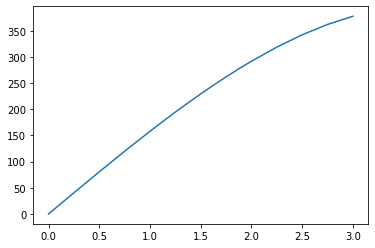

In [123]:
plt.plot(x20,uFDM6Slice,label="error when h=0.25")

In [124]:
x20

array([0.   , 0.25 , 0.5  , 0.75 , 1.   , 1.125, 1.25 , 1.375, 1.5  ,
       1.625, 1.75 , 1.875, 2.   , 2.25 , 2.5  , 2.75 , 3.   ])

Text(0.5, 0, 'position')

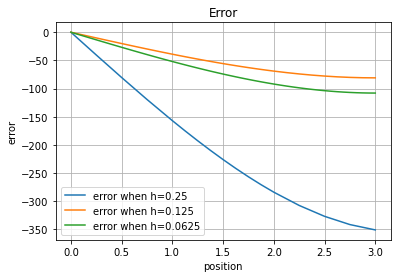

In [125]:
plt.plot(x20,uSlice-uFDM6Slice,label="error when h=0.25")
plt.plot(x7,uSlice2-uFDM5Slice,label="error when h=0.125")
plt.plot(x11,uSlice3-uFDM4Slice,label="error when h=0.0625")
plt.legend()
plt.grid()
plt.title("Error")
plt.ylabel("error")
plt.xlabel("position")